TBH theres nothing super revolutionary in here, but this is just how I generated the figure and table for section 5.1.1 on synthetic perturbation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/tig687/regularizedSB/outputs/synthetic_experiment/results.csv')


In [4]:
df.columns

Index(['lambda', 'sinkhorn', 'sinkhorn_std', 'l1_total', 'l1_total_std',
       'l2_total', 'l2_total_std', 'l1_nuisance', 'l1_nuisance_std',
       'l1_active', 'l1_active_std', 'sparsity_pct', 'sparsity_pct_std',
       'mean_sample_sparsity', 'mean_sample_sparsity_std', 'nuisance_ratio',
       'nuisance_ratio_std', 'cosine_similarity', 'cosine_similarity_std',
       'l2_error', 'l2_error_std', 'relative_l2_error',
       'relative_l2_error_std'],
      dtype='object')

In [15]:
df['nuisance_ratio']

0    0.954513
1    0.959611
2    0.961363
3    0.957785
4    0.958455
5    0.955481
Name: nuisance_ratio, dtype: float64

In [18]:
subset = df[["lambda", "l1_nuisance", "l1_nuisance_std", "l1_active", "l1_active_std", 'nuisance_ratio']]

In [19]:
subset

,lambda,l1_nuisance,l1_nuisance_std,l1_active,l1_active_std,nuisance_ratio
0,1.0,307.675164,25.475128,14.758237,2.561994,0.954513
1,4.0,348.424338,16.063468,14.738701,2.469469,0.959611
2,16.0,165.243850,114.850935,7.235321,5.852504,0.961363
3,64.0,414.500975,143.301944,18.881032,8.449515,0.957785
4,256.0,233.710608,44.404532,9.973500,1.301647,0.958455
5,1024.0,15.798121,14.992410,0.910803,1.004667,0.955481


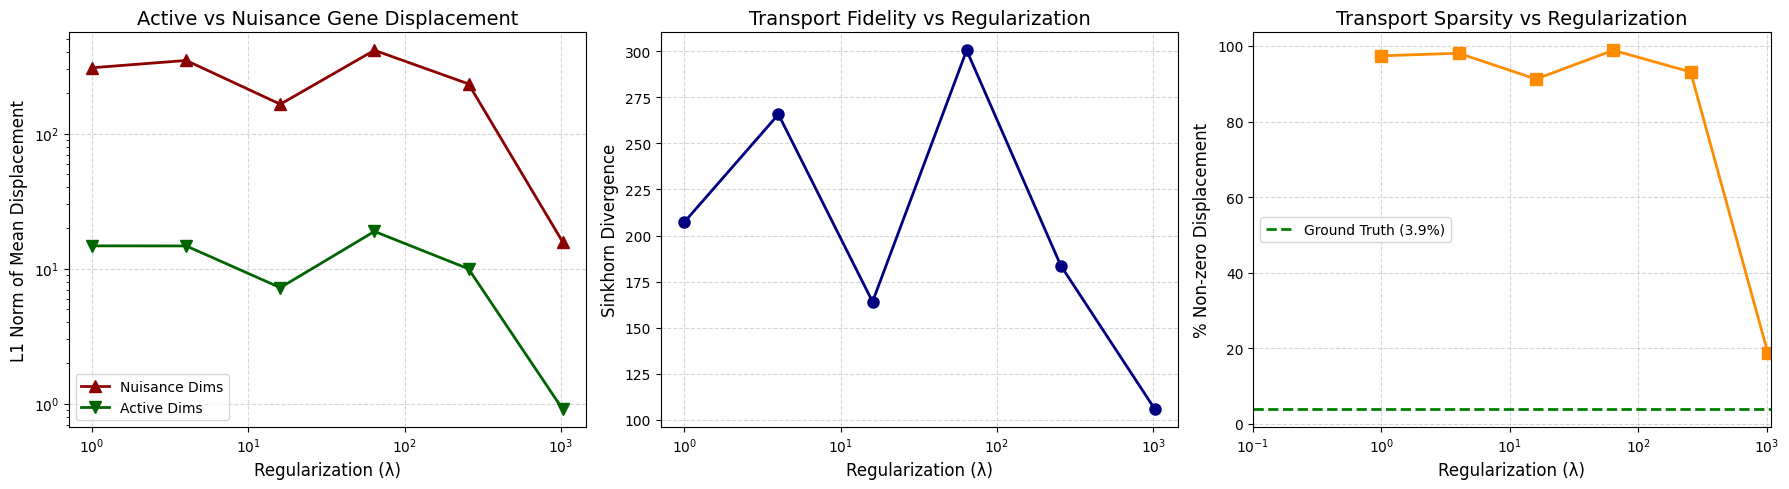

In [ ]:
# Cell: Load additional data and create plots
import matplotlib.pyplot as plt
import json

# Load perturbation info for ground truth sparsity
with open('/home/tig687/regularizedSB/outputs/synthetic_experiment/perturbation_info.json', 'r') as f:
    perturbation_info = json.load(f)

# Extract values from dataframe
lambdas = df["lambda"].values
sinkhorn_vals = df["sinkhorn"].values
sparsity_vals = df["sparsity_pct"].values
l1_nuisance_vals = df["l1_nuisance"].values
l1_active_vals = df["l1_active"].values

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax = axes[0]
ax.plot(lambdas, sinkhorn_vals, "o-", color="navy", linewidth=2, markersize=8)

ax.set_xscale("symlog", linthresh=0.01)
ax.set_xlabel("Regularization (λ)", fontsize=12)
ax.set_ylabel("Sinkhorn Divergence", fontsize=12)
ax.set_title("Transport Fidelity vs Regularization", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.5)

ax = axes[2]
ax.plot(lambdas, sparsity_vals, "s-", color="darkorange", linewidth=2, markersize=8)

# Reference line for ground-truth sparsity
gt_sparsity = 100.0 * perturbation_info["n_perturbed"] / perturbation_info["n_genes"]
ax.axhline(gt_sparsity, linestyle="--", color="green", linewidth=2, 
           label=f"Ground Truth ({gt_sparsity:.1f}%)")

ax.set_xscale("symlog", linthresh=0.01)
ax.set_xlim(left=0.1)
ax.set_xlabel("Regularization (λ)", fontsize=12)
ax.set_ylabel("% Non-zero Displacement", fontsize=12)
ax.set_title("Transport Sparsity vs Regularization", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

ax = axes[1]
ax.plot(lambdas, l1_nuisance_vals, "^-", color="darkred", linewidth=2, markersize=8, label="Nuisance Dims")
ax.plot(lambdas, l1_active_vals, "v-", color="darkgreen", linewidth=2, markersize=8, label="Active Dims")

ax.set_xscale("symlog", linthresh=0.01)
ax.set_yscale("log")
ax.set_xlabel("Regularization (λ)", fontsize=12)
ax.set_ylabel("L1 Norm of Mean Displacement", fontsize=12)
ax.set_title("Active vs Nuisance Gene Displacement", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

plt.tight_layout()
plt.savefig('2.6hogcycle.png', dpi=150, bbox_inches='tight')
plt.show()